In [2]:
import numpy as np
import pandas as pd
import scipy.spatial.distance
import seaborn as sns
import os.path
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("white")
from IPython.core.pylabtools import figsize

## Load haplotypes

In [3]:
haplotypes = pd.read_csv('/media/Shared/Data/chum/populations/pstacks/batch_4/batch_4.haplotypes.tsv', sep = '\t')
haplotypes.head()

,Catalog ID,Cnt,CMHAMM10_0002,CMHAMM10_0005,CMHAMM10_0008,CMHAMM10_0011,CMHAMM10_0012,CMHAMM10_0014,CMHAMM10_0015,CMHAMM10_0016,...,CMUW10_0003,CMUW10_0004,CMUW10_0007,CMUW10_0008,CMUW10_0009,CMUW10_0010,CMUW10_0011,CMUW10_0012,CMUW10_0015,CMUW10_0016
0,1,194,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,...,GG/TA,TA,GG/TA,GG/TA,TA,TA,TA,GG/TA,GG/TA,GG/TA
1,2,185,A/G,G,G,G,G,-,-,A/G,...,A/G,G,G,A/G,G,G,G,A/G,G,G
2,4,186,consensus,consensus,consensus,consensus,consensus,-,consensus,-,...,consensus,consensus,consensus,consensus,consensus,consensus,consensus,consensus,consensus,consensus
3,7,195,GA/GG/TA/TG,GA/GG/TA/TG,GA/GG/TA/TG,GA/GG/TA/TG,GA/TA,GA/TA,GA/GG/TA,GA/GG/TA/TG,...,GG/TA,GA/TA,GA/TA,GA/TA,GA/TA,GA/GG/TA,GG/TA,GA/TA,GA/GG/TA/TG,GA/TA
4,9,190,A/C,C,A/C,C,A/C,C,A,C,...,C,A,A,A/C,A,A,C,A/C,A,-


In [4]:
haplotypes = haplotypes.set_index('Catalog ID')
haplotypes = haplotypes.drop('Cnt', axis =1 )
haplotypes.head()

,CMHAMM10_0002,CMHAMM10_0005,CMHAMM10_0008,CMHAMM10_0011,CMHAMM10_0012,CMHAMM10_0014,CMHAMM10_0015,CMHAMM10_0016,CMHAMM10_0017,CMHAMM10_0018,...,CMUW10_0003,CMUW10_0004,CMUW10_0007,CMUW10_0008,CMUW10_0009,CMUW10_0010,CMUW10_0011,CMUW10_0012,CMUW10_0015,CMUW10_0016
Catalog ID,,,,,,,,,,,,,,,,,,,,,
1,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,...,GG/TA,TA,GG/TA,GG/TA,TA,TA,TA,GG/TA,GG/TA,GG/TA
2,A/G,G,G,G,G,-,-,A/G,G,G,...,A/G,G,G,A/G,G,G,G,A/G,G,G
4,consensus,consensus,consensus,consensus,consensus,-,consensus,-,consensus,consensus,...,consensus,consensus,consensus,consensus,consensus,consensus,consensus,consensus,consensus,consensus
7,GA/GG/TA/TG,GA/GG/TA/TG,GA/GG/TA/TG,GA/GG/TA/TG,GA/TA,GA/TA,GA/GG/TA,GA/GG/TA/TG,GA/TA,GA/TA,...,GG/TA,GA/TA,GA/TA,GA/TA,GA/TA,GA/GG/TA,GG/TA,GA/TA,GA/GG/TA/TG,GA/TA
9,A/C,C,A/C,C,A/C,C,A,C,C,C,...,C,A,A,A/C,A,A,C,A/C,A,-


## Exclude individuals excluded during genotype filtering

In [5]:
indlist = pd.read_csv(os.path.join('data','batch_4','pop_genotypes','complete.nosex'), sep = '\t', header = None)
indlist = indlist.drop(0, axis =1)
inds_to_keep = indlist[1].values.tolist()
inds_to_keep[:8]

['CMHAMM10_0002',
 'CMHAMM10_0005',
 'CMHAMM10_0008',
 'CMHAMM10_0011',
 'CMHAMM10_0012',
 'CMHAMM10_0014',
 'CMHAMM10_0015',
 'CMHAMM10_0016']

In [6]:
haplotypes = haplotypes[inds_to_keep]

## Replace:
'-' is missing data

'consensus' is scored as invariant

In [7]:
haplotypes = haplotypes.replace({'consensus':'A', '-':np.NaN})
haplotypes = haplotypes.dropna(how = 'all')
haplotypes.head()

,CMHAMM10_0002,CMHAMM10_0005,CMHAMM10_0008,CMHAMM10_0011,CMHAMM10_0012,CMHAMM10_0014,CMHAMM10_0015,CMHAMM10_0016,CMHAMM10_0017,CMHAMM10_0018,...,CMSTILL10_0067,CMSTILL10_0080,CMUW10_0001,CMUW10_0002,CMUW10_0003,CMUW10_0004,CMUW10_0007,CMUW10_0008,CMUW10_0009,CMUW10_0011
Catalog ID,,,,,,,,,,,,,,,,,,,,,
1,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,...,GG/TA,GG/TA,TA,GG/TA,GG/TA,TA,GG/TA,GG/TA,TA,TA
2,A/G,G,G,G,G,NaN,NaN,A/G,G,G,...,A/G,G,G,G,A/G,G,G,A/G,G,G
4,A,A,A,A,A,NaN,A,NaN,A,A,...,A,A,A,A,A,A,A,A,A,A
7,GA/GG/TA/TG,GA/GG/TA/TG,GA/GG/TA/TG,GA/GG/TA/TG,GA/TA,GA/TA,GA/GG/TA,GA/GG/TA/TG,GA/TA,GA/TA,...,GG/TA,GA/TA,GA/GG/TA,GA/TA,GG/TA,GA/TA,GA/TA,GA/TA,GA/TA,GG/TA
9,A/C,C,A/C,C,A/C,C,A,C,C,C,...,A/C,A/C,A/C,A/C,C,A,A,A/C,A,C


In [8]:
haplotypes.shape

(29131, 174)

## from each sample, generate two sequences per locus
    - 1,2,3,4 are variable nuceotides (substituted in below)

    - 9's are invariate positions

    - 0's are missing data

In [10]:
chromosomes = []
for catid, haps in haplotypes.iterrows():
    chrs = []
    for hap_call in haps:
        # get chr1       
        try:
            hap1 = hap_call.split('/')[0]
            var_sites = len(hap1)
            chrs.append(hap1 + '9'*(94-var_sites))
        except AttributeError:
            chrs.append('0'*94)
        # get chr2
        try:
            hap2 = hap_call.split('/')[1]
            chrs.append(hap2 + '9'*(94-var_sites))
        except AttributeError:
            chrs.append('0'*94)
        except IndexError: # homozygous
            hap2 = hap_call.split('/')[0]
            chrs.append(hap2 + '9'*(94-var_sites))
    chromosomes.append(chrs)

### maintain locus IDs

In [11]:
hap_df = pd.DataFrame(chromosomes).T
hap_df.columns = haplotypes.index
hap_df.head()

Catalog ID,1,2,4,7,9,13,14,15,16,21,...,86838,86853,86996,87091,87172,87322,87493,87988,87992,88006
0,GG99999999999999999999999999999999999999999999...,A999999999999999999999999999999999999999999999...,A999999999999999999999999999999999999999999999...,GA99999999999999999999999999999999999999999999...,A999999999999999999999999999999999999999999999...,CAGGCC9999999999999999999999999999999999999999...,A999999999999999999999999999999999999999999999...,T999999999999999999999999999999999999999999999...,A999999999999999999999999999999999999999999999...,ACA9999999999999999999999999999999999999999999...,...,A999999999999999999999999999999999999999999999...,0000000000000000000000000000000000000000000000...,A999999999999999999999999999999999999999999999...,A999999999999999999999999999999999999999999999...,0000000000000000000000000000000000000000000000...,A999999999999999999999999999999999999999999999...,A999999999999999999999999999999999999999999999...,A999999999999999999999999999999999999999999999...,A999999999999999999999999999999999999999999999...,A999999999999999999999999999999999999999999999...
1,TA99999999999999999999999999999999999999999999...,G999999999999999999999999999999999999999999999...,A999999999999999999999999999999999999999999999...,GG99999999999999999999999999999999999999999999...,C999999999999999999999999999999999999999999999...,TGTCGA9999999999999999999999999999999999999999...,A999999999999999999999999999999999999999999999...,T999999999999999999999999999999999999999999999...,G999999999999999999999999999999999999999999999...,ACA9999999999999999999999999999999999999999999...,...,A999999999999999999999999999999999999999999999...,0000000000000000000000000000000000000000000000...,A999999999999999999999999999999999999999999999...,A999999999999999999999999999999999999999999999...,0000000000000000000000000000000000000000000000...,A999999999999999999999999999999999999999999999...,A999999999999999999999999999999999999999999999...,A999999999999999999999999999999999999999999999...,A999999999999999999999999999999999999999999999...,A999999999999999999999999999999999999999999999...
2,GG99999999999999999999999999999999999999999999...,G999999999999999999999999999999999999999999999...,A999999999999999999999999999999999999999999999...,GA99999999999999999999999999999999999999999999...,C999999999999999999999999999999999999999999999...,TGTCGA9999999999999999999999999999999999999999...,A999999999999999999999999999999999999999999999...,T999999999999999999999999999999999999999999999...,A999999999999999999999999999999999999999999999...,ACA9999999999999999999999999999999999999999999...,...,A999999999999999999999999999999999999999999999...,0000000000000000000000000000000000000000000000...,A999999999999999999999999999999999999999999999...,A999999999999999999999999999999999999999999999...,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,A999999999999999999999999999999999999999999999...,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...
3,TA99999999999999999999999999999999999999999999...,G999999999999999999999999999999999999999999999...,A999999999999999999999999999999999999999999999...,GG99999999999999999999999999999999999999999999...,C999999999999999999999999999999999999999999999...,TGTCGA9999999999999999999999999999999999999999...,A999999999999999999999999999999999999999999999...,T999999999999999999999999999999999999999999999...,G999999999999999999999999999999999999999999999...,TGG9999999999999999999999999999999999999999999...,...,A999999999999999999999999999999999999999999999...,0000000000000000000000000000000000000000000000...,A999999999999999999999999999999999999999999999...,A999999999999999999999999999999999999999999999...,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,A9999999999999999999999999

# Calculate pi
as the jaccard similary of sequences:

"Jaccard distance between the points. Given two vectors, u and v, the Jaccard distance is the proportion of those elements u[i] and v[i] that disagree where at least one of them is non-zero."

[http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.spatial.distance.pdist.html]

#### Per locus I produce a distance matrix of pairwise nucleotide difference between chromosomes, some within population and some between.

#### Different subsets of this distance matrix show within and between population comparisons.

## Still need one more dimension - break up each locus into sites

In [12]:
Pi_of_locus = dict()
pdist_of_locus = dict()
for locus in hap_df.columns:
    myseqs = []
    for x in hap_df[locus].values.tolist():
        try:
            myseqs.append(list(x))
        except TypeError:
            myseqs.append([np.NaN]*94)
    myseqs = pd.DataFrame(myseqs)
    myseqs = myseqs.replace({'A':1, 'C':2, 'G':3, 'T':4})
    pdist_mat = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(myseqs, 'jaccard'))
    ## found values of 1 to be from comparing missing values to anything non-missing - remove
    pdist_mat = pd.DataFrame(pdist_mat).replace({1:np.NaN})
    pdist_of_locus[locus] = pdist_mat    
    ## remove chomosomes with mostly missing values 
    cleaned_pdist_mat = pdist_mat.dropna(thresh = 50, axis = 0)
    cleaned_pdist_mat = cleaned_pdist_mat.dropna(thresh = 50, axis = 1)
    # mean calulated without zeros as self-compairisons    
    Pi_of_locus[locus] = np.nanmean(scipy.spatial.distance.squareform(cleaned_pdist_mat))

## testing

for locus in [7]:
    myseqs = []
    for x in hap_df[locus].values.tolist():
        try:
            myseqs.append(list(x))
        except TypeError:
            myseqs.append([np.NaN]*94)
    myseqs = pd.DataFrame(myseqs)
    myseqs = myseqs.replace({'A':1, 'C':2, 'G':3, 'T':4})
    pdist_mat = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(myseqs, 'jaccard'))
    ## found values of 1 to be from comparing missing values to anything non-missing - remove
    pdist_mat = pd.DataFrame(pdist_mat).replace({1:np.NaN})
    pdist_of_locus[locus] = pdist_mat    
    ## remove chomosomes with mostly missing values 
    cleaned_pdist_mat = pdist_mat.dropna(thresh = 50, axis = 0)
    cleaned_pdist_mat = cleaned_pdist_mat.dropna(thresh = 50, axis = 1)
    # mean calulated without zeros as self-compairisons    
    Pi_of_locus[locus] = np.nanmean(scipy.spatial.distance.squareform(cleaned_pdist_mat))

### merge with individual IDs

In [19]:
indlist = pd.read_csv(os.path.join('data','batch_4','pop_genotypes','complete.nosex'), sep = '\t', header = None)
indlist.head()

,0,1
0,1,CMHAMM10_0002
1,1,CMHAMM10_0005
2,1,CMHAMM10_0008
3,1,CMHAMM10_0011
4,1,CMHAMM10_0012


In [20]:
chr_index = pd.concat([indlist, indlist]).sort_values([0,1])
chr_index.columns = ['pop', 'ind']
chr_index['chr'] = ['a','b']*174
chr_index.shape
chr_index = chr_index.reset_index(drop = True)
chr_index.head()

,pop,ind,chr
0,1,CMHAMM10_0002,a
1,1,CMHAMM10_0002,b
2,1,CMHAMM10_0005,a
3,1,CMHAMM10_0005,b
4,1,CMHAMM10_0008,a


In [21]:
len(pdist_of_locus)

29131

### calculate pairwise nucleotide diversity between all chromosomes within each population
chromosomes are not compared to themselves

In [22]:
def get_within_pi(pdist_df):
    within_pi_of_pop = dict()
    for xx in range(1,11):
        within_pdist_vals = pdist_df.loc[xx,xx].values
        np.fill_diagonal(within_pdist_vals,np.NaN)
        within_pi_of_pop[xx] = np.nanmean(within_pdist_vals)
    return(within_pi_of_pop)

## Calculate d_xy, the mean pairwise necelotide diversity between chromosomes from different populations

In [23]:
def get_dxy(pdist_df):
    between_pi_of_pops = dict()
    for xx in range(1,11):
        for yy in range(1,xx):
            between_pdist_vals = pdist_df.loc[yy,xx]
            between_pi_of_pops[yy,xx] = np.nanmean(between_pdist_vals)
    return(between_pi_of_pops)

## apply to each locus' pairwise pi matrix

In [25]:
count = 0
with open(os.path.join('results','batch_4','pop_analysis','within_pi.txt'), 'w') as WITHIN:
    with open(os.path.join('results','batch_4','pop_analysis','dxy.txt'), 'w') as DXY:
        for locus,pdist in pdist_of_locus.items():
            count +=1 
            if count %100 == 0:
                print count, locus
            pdist = pd.concat([chr_index, pdist], axis = 1)
            pdist = pdist.set_index(['pop', 'ind', 'chr'])
            pdist.columns = pdist.index
            for pop,within_pi in get_within_pi(pdist).items():
                WITHIN.write('{}\t{}\t{}\n'.format(locus,pop,within_pi))
            for pops,dxy in get_dxy(pdist).items():
                pop1 = pops[0]
                pop2 = pops[1]
                DXY.write('{}\t{}\t{}\t{}\n'.format(locus,pop1, pop2, dxy))

100 192
200 398
300 619
400 858
500 1087
600 1277
700 1481
800 1667
900 1887
1000 2095
1100 2296
1200 2492
1300 2720
1400 2921
1500 3164
1600 3346
1700 3559
1800 3804
1900 4022
2000 4222
2100 4421
2200 4623
2300 4838
2400 5062
2500 5287
2600 5506
2700 5725
2800 5928
2900 6152
3000 6377
3100 6589
3200 6787
3300 6992
3400 7219
3500 7418
3600 7626
3700 7842
3800 8090
3900 8328
4000 8537
4100 8770
4200 9002
4300 9254
4400 9480
4500 9685
4600 9893
4700 10110
4800 10364
4900 10608
5000 10821
5100 11078
5200 11293
5300 11528
5400 11768
5500 11982
5600 12225
5700 12454
5800 12653
5900 12892
6000 13115
6100 13320
6200 13529
6300 13773
6400 14014
6500 14231
6600 14451
6700 14680
6800 14913
6900 15137
7000 15351
7100 15571
7200 15783
7300 16027
7400 16280
7500 16490
7600 16701
7700 16950
7800 17197
7900 17429
8000 17725
8100 17966
8200 18209
8300 18423
8400 18636
8500 18866
8600 19091
8700 19337
8800 19585
8900 19812
9000 20040
9100 20284
9200 20514
9300 20771
9400 21017
9500 21246
9600 21470
970

In [ ]:
assert False

In [308]:
within_pi = pd.read_csv('/home/ipseg/Desktop/waples/temp/within_pi.txt', sep = 't', header = None)
dxy = pd.read_csv('/home/ipseg/Desktop/waples/temp/dxy.txt', sep = '\t', header = None)
dxy.columns = ['locus', 'pop1', 'pop2', 'dxy']
dxy.groupby('locus').mean()['dxy']

locus
1        0.010642
2        0.002187
4        0.000000
7        0.008766
9        0.005354
13       0.031836
14       0.000000
15       0.004284
16       0.004655
21       0.016047
22       0.020448
23       0.000000
24       0.000000
25       0.010155
26       0.007089
28       0.003045
30       0.004830
31       0.004274
33       0.000000
36       0.009776
37       0.026216
38       0.000000
39       0.003515
43       0.000000
44       0.000000
45       0.003883
46       0.003524
47       0.000000
48       0.026571
50       0.018493
           ...   
84780    0.000000
85288    0.000000
85541    0.000000
85567    0.000000
85607    0.000000
85611    0.000000
85699    0.000000
85703    0.000000
85814    0.000000
85820    0.000000
85959    0.000000
86062    0.000000
86111    0.000000
86147    0.000000
86331    0.000000
86425    0.000000
86494    0.000000
86564    0.000000
86653    0.000000
86723    0.000000
86838    0.000000
86853    0.000000
86996    0.000000
87091    0.000000
8717

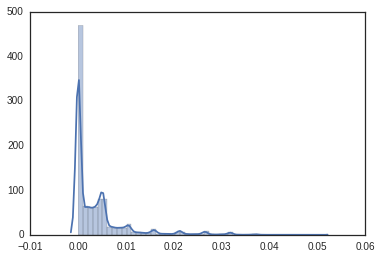

In [310]:
sns.distplot(dxy.groupby('locus').mean()['dxy'].values)

In [266]:
test_pdist = pdist_of_locus[193]
test_pdist = pd.concat([chr_index, test_pdist], axis = 1)
test_pdist = test_pdist.set_index(['pop', 'ind', 'chr'])
test_pdist.columns = test_pdist.index
test_pdist.head()

pop                              1                                     \
ind                   CMHAMM10_0002           CMHAMM10_0005             
chr                               a         b             a         b   
pop ind           chr                                                   
1   CMHAMM10_0002 a        0.000000  0.010638      0.010638  0.010638   
                  b        0.010638  0.000000      0.021277  0.021277   
    CMHAMM10_0005 a        0.010638  0.021277      0.000000  0.000000   
                  b        0.010638  0.021277      0.000000  0.000000   
    CMHAMM10_0008 a        0.010638  0.000000      0.021277  0.021277   

pop                                                                    \
ind                   CMHAMM10_0008           CMHAMM10_0011             
chr                               a         b             a         b   
pop ind           chr                                                   
1   CMHAMM10_0002 a        0.010638  0.010638      0.000000  0.021277   
                  b        0.000000  0.021277      0.010638  0.010638   
    CMHAMM10_0005 a        0.021277  0.000000      0.010638  0.010638   
                  b        0.021277  0.000000      0.010638  0.010638   
    CMHAMM10_0008 a        0.000000  0.021277      0.010638  0.010638   

pop                                              ...             10            \
ind                   CMHAMM10_0012              ...    CMUW10_0004             
chr                               a         b    ...              a         b   
pop ind           chr                            ...                            
1   CMHAMM10_0002 a        0.000000  0.021277    ...       0.000000  0.010638   
                  b        0.010638  0.010638    ...       0.010638  0.000000   
    CMHAMM10_0005 a        0.010638  0.010638    ...       0.010638  0.021277   
                  b        0.010638  0.010638    ...       0.010638  0.021277   
    CMHAMM10_0008 a        0.010638  0.010638    ...       0.010638  0.000000   

pop                                                                            \
ind                   CMUW10_0007           CMUW10_0008           CMUW10_0009   
chr                             a         b           a         b           a   
pop ind           chr                                                           
1   CMHAMM10_0002 a      0.000000  0.010638    0.010638  0.000000    0.010638   
                  b      0.010638  0.021277    0.021277  0.010638    0.021277   
    CMHAMM10_0005 a      0.010638  0.000000    0.021277  0.010638    0.021277   
                  b      0.010638  0.000000    0.021277  0.010638    0.021277   
    CMHAMM10_0008 a      0.010638  0.021277    0.021277  0.010638    0.021277   

pop                                                    
ind                             CMUW10_0011            
chr                           b           a         b  
pop ind           chr                                  
1   CMHAMM10_0002 a    0.010638    0.010638  0.021277  
                  b    0.000000    0.000000  0.010638  
    CMHAMM10_0005 a    0.021277    0.021277  0.010638  
                  b    0.021277    0.021277  0.010638  
    CMHAMM10_0008 a    0.000000    0.000000  0.010638  

[5 rows x 348 columns]

## Testing the above functions

In [231]:
get_within_pi(test_pdist)

{1: 0.0096699399890889243,
 2: 0.0066560473318921379,
 3: 0.0084424440807419534,
 4: 0.010606636271529886,
 5: 0.0095828345625619434,
 6: 0.0085659021829234596,
 7: 0.0070359112912304397,
 8: 0.0081560283687943259,
 9: 0.0099181669394435342,
 10: 0.0098404255319148922}

In [232]:
np.mean(get_within_pi(test_pdist).values())

0.0088474336550121487

In [242]:
get_dxy(test_pdist)

{(1, 2): 0.0083541927409261571,
 (1, 3): 0.0091888297872340426,
 (1, 4): 0.010355718085106384,
 (1, 5): 0.0097028613352898013,
 (1, 6): 0.0093568665377175998,
 (1, 7): 0.0085486322188449843,
 (1, 8): 0.0091090425531914904,
 (1, 9): 0.009942716857610473,
 (1, 10): 0.0096742021276595737,
 (2, 3): 0.0074155193992490607,
 (2, 4): 0.0088196182728410497,
 (2, 5): 0.0081243796124465927,
 (2, 6): 0.0075378313801342583,
 (2, 7): 0.0066601108528517774,
 (2, 8): 0.0076658322903629525,
 (2, 9): 0.0083517858862039076,
 (2, 10): 0.0079787234042553185,
 (3, 4): 0.0095827792553191491,
 (3, 5): 0.0089600146735143056,
 (3, 6): 0.0082688588007736926,
 (3, 7): 0.0076367781155015193,
 (3, 8): 0.0087101063829787221,
 (3, 9): 0.0092062193126022911,
 (3, 10): 0.0087765957446808516,
 (4, 5): 0.0099676724137931043,
 (4, 6): 0.0097769584139264995,
 (4, 7): 0.0088692059270516696,
 (4, 8): 0.0094331781914893595,
 (4, 9): 0.010024549918166937,
 (4, 10): 0.0099110704787234022,
 (5, 6): 0.0091542719935970105,
 (5, 7)

In [169]:
test_pdist.loc[3,3]
# fails with missing data
scipy.spatial.distance.squareform(test_pdist.loc[3,3]).mean()
scipy.spatial.distance.squareform(test_pdist.loc[1,1]).mean()

ValueError: Distance matrix 'X' must be symmetric.

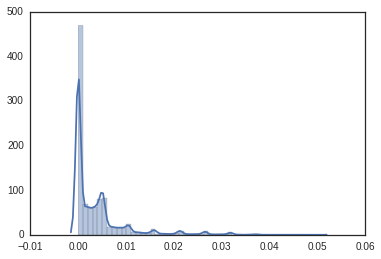

In [62]:
sns.distplot(Pi_of_locus.values())

In [ ]:
assert False

In [ ]:
myseqs = []
for x in hap_df[1].values.tolist():
    try:
        myseqs.append(list(x))
    except TypeError:
        myseqs.append([np.NaN]*94)

In [ ]:
myseqs = pd.DataFrame(myseqs)
myseqs = myseqs.replace({'A':1, 'C':2, 'G':3, 'T':4})
myseqs.head()

In [ ]:
## jaccard distance will all missing values for one array is 1

In [ ]:
scipy.spatial.distance.jaccard(myseqs.ix[22].values, myseqs.ix[20].values)

In [ ]:
myseqs.ix[22].values, myseqs.ix[21].values

In [ ]:
pdist_mat = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(myseqs, 'jaccard'))
pdist_mat = pd.DataFrame(pdist_mat).replace({1:np.NaN})
pdist_mat = pdist_mat.dropna(thresh = 50, axis = 0)
pdist_mat = pdist_mat.dropna(thresh = 50, axis = 1)
pdist_mat.head()

In [ ]:
print 'mean', np.nanmean(scipy.spatial.distance.squareform(pdist_mat)) # mean calulated without zeros as self-compairisons

In [ ]:
scipy.spatial.distance.squareform(pdist_mat)

In [ ]:
figsize(12,12)
sns.clustermap(pdist_mat, square=True, linewidths=0)

In [ ]:
[x for x in 'GGXXXXXXXXXXXXXXXXX']
[x for x in np.NaN]

In [ ]:
## Generate random sequences
NUCLEOTIDES = '11111111111111111111111111111111111111111111111111111234'
NUCLEOTIDES = np.array([x for x in NUCLEOTIDES])
SEQ_LEN = 100
NUM_SEQ = 10

randseqs = np.random.choice(NUCLEOTIDES, size = (NUM_SEQ, SEQ_LEN), replace = True)
pd.DataFrame(randseqs)

normalized Hamming distance

In [ ]:
print 'mean', scipy.spatial.distance.pdist(randseqs, 'hamming').mean() # mean calulated without zeros as self-compairisons
scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(randseqs, 'hamming')).shape